In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\Familia\Documents\salario minimo\Historico_salario_minimo_mexico1.csv')

print(data.head())

     Vigencia  Zona A     Zona B     Zona C  Zona Fronteriza
0  01/01/2020  123.22  Eliminada  Eliminada           185.56
1  01/01/2019  102.68  Eliminada  Eliminada           176.72
2  01/01/2018   88.36  Eliminada  Eliminada              NaN
3  01/01/2017   80.04  Eliminada  Eliminada              NaN
4  01/01/2016   73.04  Eliminada  Eliminada              NaN


In [ ]:
data['Vigencia'] = pd.to_datetime(data['Vigencia'], format = '%d/%m/%Y')

columnas_convertidas = ['Zona A', 'Zona B', 'Zona C', 'Zona Fronteriza']
for col in columnas_convertidas:
    data[col] = data[col].replace('Eliminada', None).astype(float)

print(data.info)

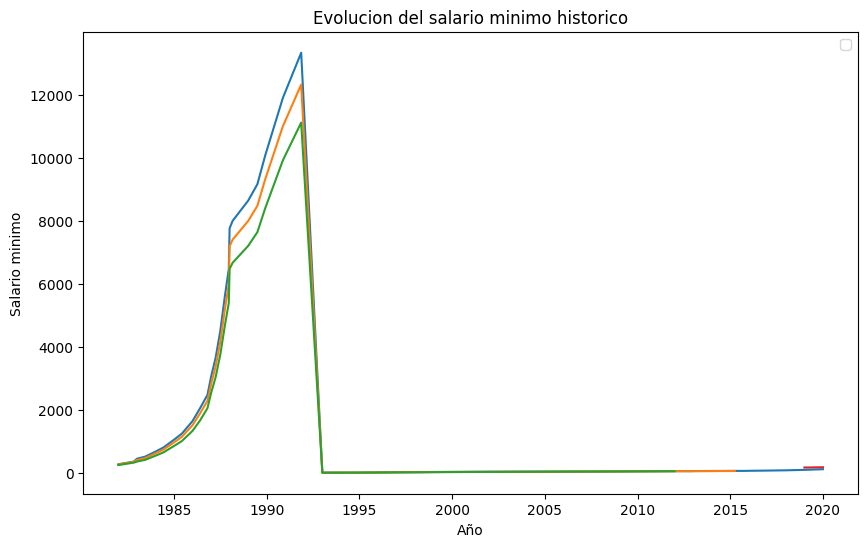

In [3]:
plt.figure(figsize=(10,6))
for col in columnas_convertidas:
    plt.plot(data['Vigencia'], data[col],label=col)

plt.title('Evolucion del salario minimo historico')
plt.xlabel('Año')
plt.ylabel('Salario minimo')
##plt.gca().invert_yaxis()  # Invierte el eje Y (salario)
##plt.gca().invert_xaxis()
plt.legend('')
plt.grid('')
plt.show()

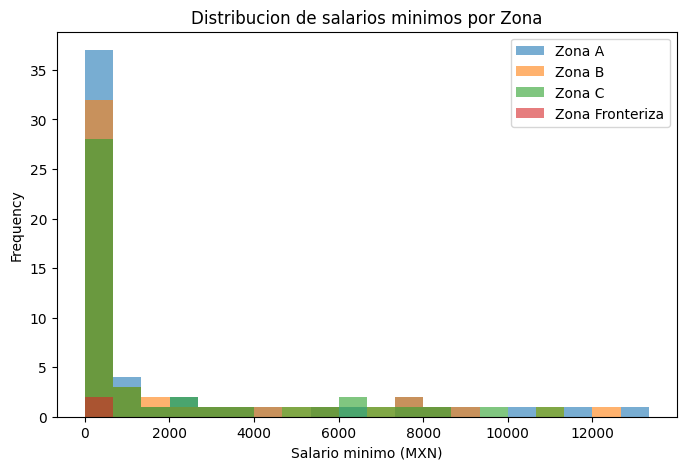

In [4]:
data[columnas_convertidas].plot(kind='hist',alpha=0.6,bins=20,figsize=(8,5))
plt.title('Distribucion de salarios minimos por Zona')
plt.xlabel('Salario minimo (MXN)')
plt.show()

c:\Users\Familia\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Familia\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Familia\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Familia\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

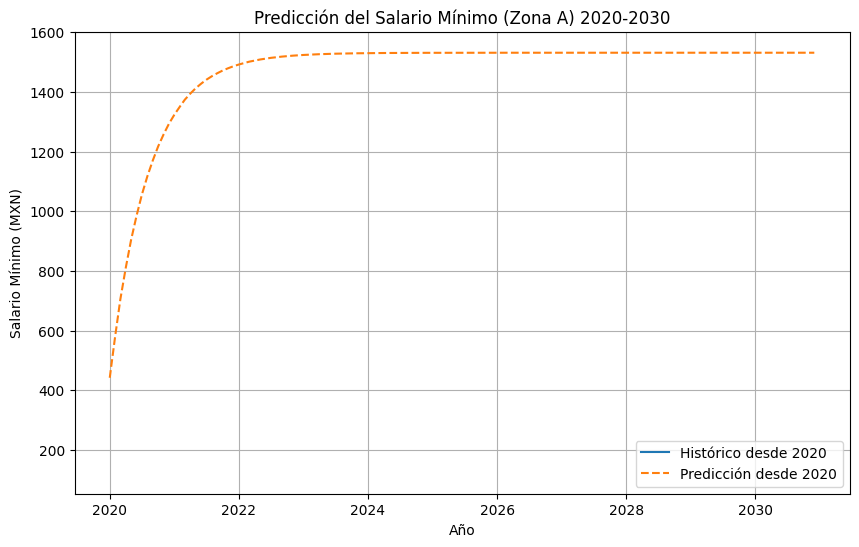

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Preparar los datos
zona_a = data[['Vigencia', 'Zona A']].dropna()
zona_a.set_index('Vigencia', inplace=True)

# Filtrar datos históricos desde 2020
zona_a_filtered = zona_a[zona_a.index >= '2020-01-01']

# Ajustar el modelo ARIMA
model = ARIMA(zona_a, order=(1, 1, 1))
model_fit = model.fit()

# Generar predicción desde 2020 hasta 2030
forecast_steps = 132  # 11 años (2020-2030)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2020-01-01', periods=forecast_steps, freq='MS')
forecast_values = forecast.predicted_mean

# Visualización del pronóstico desde 2020
plt.figure(figsize=(10, 6))
plt.plot(zona_a_filtered.index, zona_a_filtered['Zona A'], label='Histórico desde 2020')
plt.plot(forecast_index, forecast_values, label='Predicción desde 2020', linestyle='--')
plt.title('Predicción del Salario Mínimo (Zona A) 2020-2030')
plt.xlabel('Año')
plt.ylabel('Salario Mínimo (MXN)')
plt.legend()
plt.grid()
plt.show()
